In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]

In [7]:
import os

os.environ["ISA_USER_ID"] = "1"

if not "ISA_USER_ID" in os.environ:
    print("PASS ENV VARIABLE ->  ISA_USER_ID")
    exit()
    
vizFlag=True
if "ISA_NO_PLOT" in os.environ:
    vizFlag = False
        
userid=os.environ["ISA_USER_ID"]

In [8]:
userid=1
filename="../users/{}/gsr_readings.csv".format(userid)

In [9]:
gsr = pd.read_csv(filename)

In [10]:
gsr.timestamp = pd.to_datetime(gsr.timestamp)

/home/sampad/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


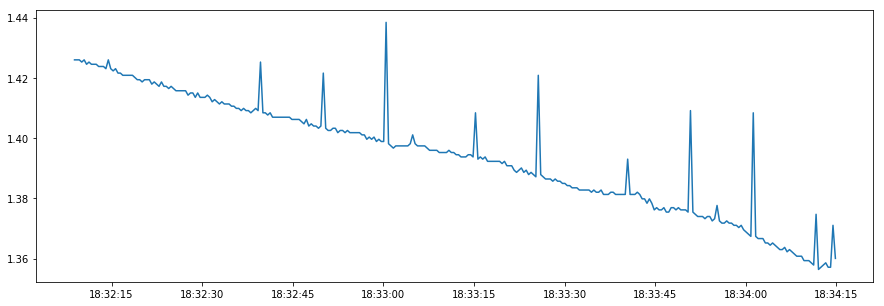

In [11]:
if vizFlag:
    plt.plot(gsr.timestamp,gsr.voltage)

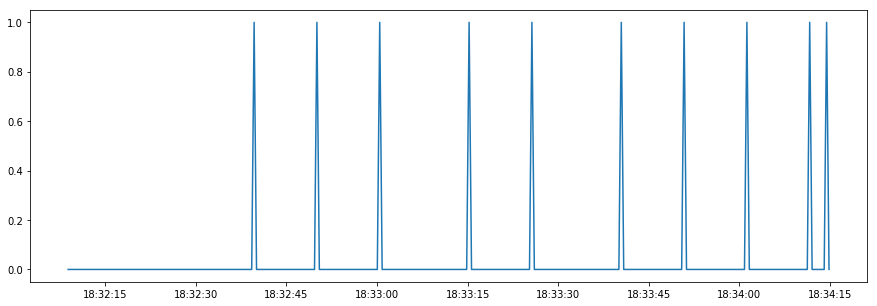

In [12]:
if vizFlag:
    plt.plot(gsr.timestamp,gsr.voltage.diff() > 0.01)

In [13]:
threshold50Hz = 0.01

mask = (gsr.voltage.diff() > threshold50Hz)
mask[0] = False
nPeaks=mask.apply(lambda x: 1 if x else 0).sum()

In [14]:
df = gsr.voltage
normalized_df=(df-df.min())/(df.max()-df.min())
gsr["normalised_voltage"] = normalized_df

<StemContainer object of 3 artists>

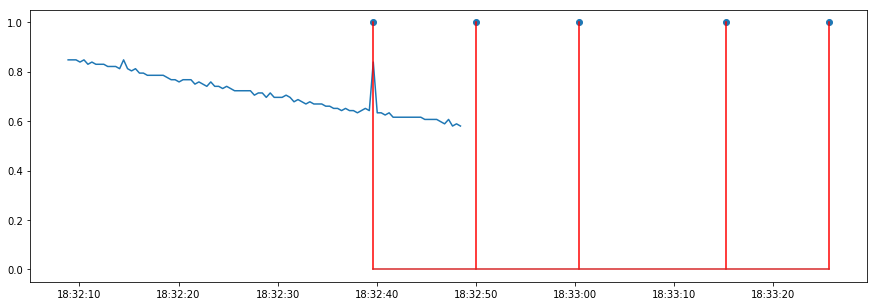

In [15]:
if vizFlag:
    plt.plot(gsr.timestamp.head(100),gsr.normalised_voltage.head(100))
    plt.stem(gsr[mask].timestamp.head(5),[1]*5,'r')

In [16]:
for indx in gsr[mask].index:
    window_indices=[indx-1,indx+1]
    
    normalised_voltage_mean=gsr.iloc[window_indices].normalised_voltage.mean()
    voltage_mean=gsr.iloc[window_indices].voltage.mean()
    
    gsr.normalised_voltage.iloc[indx] = normalised_voltage_mean
    gsr.voltage.iloc[indx] = voltage_mean

/home/sampad/.local/lib/python3.5/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


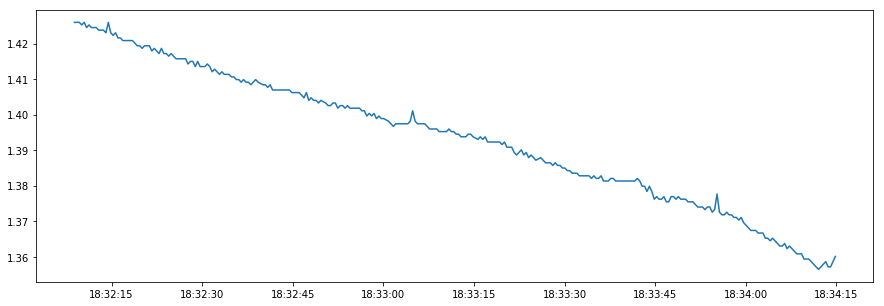

In [17]:
if vizFlag:
    #plt.plot(gsr.timestamp,gsr.normalised_voltage)
    plt.plot(gsr.timestamp,gsr.voltage)
    #plt.stem(gsr[mask].timestamp,[1]*nPeaks,'r')

In [18]:
gsr.to_csv("{}.filtered".format(filename))